In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv("healthcare_dataset.csv")
data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [5]:
data['Name'] = data['Name'].str.title()
data['Gender'] = data['Gender'].str.capitalize()
data['Medical Condition'] = data['Medical Condition'].str.title()
data['Doctor'] = data['Doctor'].str.title()
data['Hospital'] = data['Hospital'].str.title()
data['Insurance Provider'] = data['Insurance Provider'].str.title()
data['Admission Type'] = data['Admission Type'].str.capitalize()
data['Medication'] = data['Medication'].str.title()
data['Test Results'] = data['Test Results'].str.capitalize()

In [6]:
duplicates = data.duplicated().sum()
duplicates

np.int64(534)

In [7]:
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'], errors='coerce')
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'], errors='coerce')

In [8]:
invalid_dates = data[data['Discharge Date'] < data['Date of Admission']]

In [9]:
cleaning_summary = {
    "Text Standardized": ["Name", "Gender", "Medical Condition", "Doctor", "Hospital",
                          "Insurance Provider", "Admission Type", "Medication", "Test Results"],
    "Duplicate Entries Found": duplicates,
    "Invalid Date Rows": invalid_dates.shape[0],
    "Invalid Date Examples": invalid_dates.head()
}
cleaning_summary

{'Text Standardized': ['Name',
  'Gender',
  'Medical Condition',
  'Doctor',
  'Hospital',
  'Insurance Provider',
  'Admission Type',
  'Medication',
  'Test Results'],
 'Duplicate Entries Found': np.int64(534),
 'Invalid Date Rows': 0,
 'Invalid Date Examples': Empty DataFrame
 Columns: [Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results]
 Index: []}

In [10]:
data_cleaned = data.drop_duplicates()
data_cleaned

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,Elizabeth Jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,Kyle Perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,Heather Wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs Dvm,"And Mahoney Johnson Vasquez,",Unitedhealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,Jennifer Jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd And Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [11]:
print(f"Rows after removing duplicates: {data_cleaned.shape[0]}")

Rows after removing duplicates: 54966


In [12]:
data_cleaned['Name'] = data_cleaned['Name'].str.capitalize()


C:\Users\Olayinka\AppData\Local\Temp\ipykernel_10928\1507727824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Name'] = data_cleaned['Name'].str.capitalize()


In [13]:
data_cleaned

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,Elizabeth jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,Kyle perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,Heather wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs Dvm,"And Mahoney Johnson Vasquez,",Unitedhealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,Jennifer jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd And Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [14]:
data_cleaned['Date of Admission'] = pd.to_datetime(data_cleaned['Date of Admission'])

# Extract Month and Year
data_cleaned['Month'] = data_cleaned['Date of Admission'].dt.month_name()
data_cleaned['Year'] = data_cleaned['Date of Admission'].dt.year

C:\Users\Olayinka\AppData\Local\Temp\ipykernel_10928\1305992036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Date of Admission'] = pd.to_datetime(data_cleaned['Date of Admission'])
C:\Users\Olayinka\AppData\Local\Temp\ipykernel_10928\1305992036.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Month'] = data_cleaned['Date of Admission'].dt.month_name()
C:\Users\Olayinka\AppData\Local\Temp\ipykernel_10928\1305992036.py:5: SettingWithCopyWarning: 
A value is trying to be s

In [15]:
data_cleaned

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Month,Year
0,Bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,January,2024
1,Leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,August,2019
2,Danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,September,2022
3,Andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,November,2020
4,Adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,September,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,Elizabeth jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal,August,2020
55496,Kyle perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal,January,2020
55497,Heather wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs Dvm,"And Mahoney Johnson Vasquez,",Unitedhealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal,July,2020
55498,Jennifer jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd And Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal,May,2019


In [16]:
# Ensure 'Billing Amount' is a numeric type
data_cleaned['Billing Amount'] = pd.to_numeric(data_cleaned['Billing Amount'], errors='coerce')

# Round the values to 2 decimal places
data_cleaned['Billing Amount'] = data_cleaned['Billing Amount'].round(2)

C:\Users\Olayinka\AppData\Local\Temp\ipykernel_10928\3046769832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Billing Amount'] = pd.to_numeric(data_cleaned['Billing Amount'], errors='coerce')
C:\Users\Olayinka\AppData\Local\Temp\ipykernel_10928\3046769832.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Billing Amount'] = data_cleaned['Billing Amount'].round(2)


In [17]:
data_cleaned

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Month,Year
0,Bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal,January,2024
1,Leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,August,2019
2,Danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.10,205,Emergency,2022-10-07,Aspirin,Normal,September,2022
3,Andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.78,450,Elective,2020-12-18,Ibuprofen,Abnormal,November,2020
4,Adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,2022-10-09,Penicillin,Abnormal,September,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,Elizabeth jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.71,417,Elective,2020-09-15,Penicillin,Abnormal,August,2020
55496,Kyle perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.80,316,Elective,2020-02-01,Aspirin,Normal,January,2020
55497,Heather wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs Dvm,"And Mahoney Johnson Vasquez,",Unitedhealthcare,27620.76,347,Urgent,2020-08-10,Ibuprofen,Abnormal,July,2020
55498,Jennifer jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd And Castro,",Medicare,32451.09,321,Elective,2019-05-31,Ibuprofen,Abnormal,May,2019


In [18]:
data_cleaned.to_csv("cleaned_healthcare_dataset.csv", index=False)

In [19]:
import pandas as pd
import numpy as np
data_cleaned = pd.read_csv("cleaned_healthcare_dataset.csv")
data_cleaned

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Month,Year
0,Bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal,January,2024
1,Leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,August,2019
2,Danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.10,205,Emergency,2022-10-07,Aspirin,Normal,September,2022
3,Andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.78,450,Elective,2020-12-18,Ibuprofen,Abnormal,November,2020
4,Adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,2022-10-09,Penicillin,Abnormal,September,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,Elizabeth jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.71,417,Elective,2020-09-15,Penicillin,Abnormal,August,2020
54962,Kyle perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.80,316,Elective,2020-02-01,Aspirin,Normal,January,2020
54963,Heather wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs Dvm,"And Mahoney Johnson Vasquez,",Unitedhealthcare,27620.76,347,Urgent,2020-08-10,Ibuprofen,Abnormal,July,2020
54964,Jennifer jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd And Castro,",Medicare,32451.09,321,Elective,2019-05-31,Ibuprofen,Abnormal,May,2019


In [21]:
# Assuming 'Date of Admission' and 'Discharge Date' are in datetime format
data_cleaned['Date of Admission'] = pd.to_datetime(data_cleaned['Date of Admission'])
data_cleaned['Discharge Date'] = pd.to_datetime(data_cleaned['Discharge Date'])

# Calculate the healing time (difference in days)
data_cleaned['Healing Time (Days)'] = (data_cleaned['Discharge Date'] - data_cleaned['Date of Admission']).dt.days

# Group by medical condition and calculate the average healing time
healing_time_by_condition = data_cleaned.groupby('Medical Condition')['Healing Time (Days)'].sum().reset_index()

# Sort by healing time in descending order to see the longest healing conditions first
healing_time_by_condition = healing_time_by_condition.sort_values('Healing Time (Days)', ascending=False)

# Sort by healing time in months in descending order
healing_time_by_condition = healing_time_by_condition.sort_values('Healing Time (Days)', ascending=False)

# Display the result
print(healing_time_by_condition)



  Medical Condition  Healing Time (Days)
0         Arthritis               142918
1            Asthma               142585
3          Diabetes               142209
2            Cancer               141681
5           Obesity               141284
4      Hypertension               141257


In [22]:

# Replace 'Medicaton' with the appropriate medication for treatment
data_cleaned.loc[data_cleaned['Medical Condition'] == 'Obesity', 'Medication'] = "Appetite Suppressants"

data_cleaned.loc[data_cleaned['Medical Condition'] == 'Cancer', 'Medication'] = "Chemotherapy"

data_cleaned.loc[data_cleaned['Medical Condition'] == 'Asthma', 'Medication'] = "Inhaler"

data_cleaned.loc[data_cleaned['Medical Condition'] == 'Diabetes', 'Medication'] = "Insulin"

data_cleaned.loc[data_cleaned['Medical Condition'] == 'Hypertension', 'Medication'] = "Diuretics (Water Pills)"

data_cleaned.loc[data_cleaned['Medical Condition'] == 'Arthritis', 'Medication'] = "Nonsteroidal Anti-Inflammatory Drugs (NSAIDs)"


data_cleaned


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Month,Year,Healing Time (Days)
0,Bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Chemotherapy,Normal,January,2024,2
1,Leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Appetite Suppressants,Inconclusive,August,2019,6
2,Danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.10,205,Emergency,2022-10-07,Appetite Suppressants,Normal,September,2022,15
3,Andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.78,450,Elective,2020-12-18,Insulin,Abnormal,November,2020,30
4,Adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,2022-10-09,Chemotherapy,Abnormal,September,2022,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,Elizabeth jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.71,417,Elective,2020-09-15,Inhaler,Abnormal,August,2020,30
54962,Kyle perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.80,316,Elective,2020-02-01,Appetite Suppressants,Normal,January,2020,9
54963,Heather wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs Dvm,"And Mahoney Johnson Vasquez,",Unitedhealthcare,27620.76,347,Urgent,2020-08-10,Diuretics (Water Pills),Abnormal,July,2020,28
54964,Jennifer jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd And Castro,",Medicare,32451.09,321,Elective,2019-05-31,Nonsteroidal Anti-Inflammatory Drugs (NSAIDs),Abnormal,May,2019,6



Hospital: Group Smith
Medical Condition  count
         Diabetes     10
           Asthma      7
     Hypertension      6
           Cancer      4
        Arthritis      3
          Obesity      2

Hospital: Johnson Inc
Medical Condition  count
           Asthma      9
           Cancer      9
          Obesity      8
        Arthritis      5
         Diabetes      3

Hospital: Johnson Plc
Medical Condition  count
           Asthma      9
        Arthritis      7
           Cancer      7
         Diabetes      6
     Hypertension      6
          Obesity      2

Hospital: Llc Smith
Medical Condition  count
         Diabetes     11
     Hypertension     11
        Arthritis      8
           Cancer      5
          Obesity      5
           Asthma      4

Hospital: Ltd Smith
Medical Condition  count
          Obesity     11
        Arthritis      9
           Cancer      6
     Hypertension      6
         Diabetes      4
           Asthma      3

Hospital: Smith Group
Medical Conditio

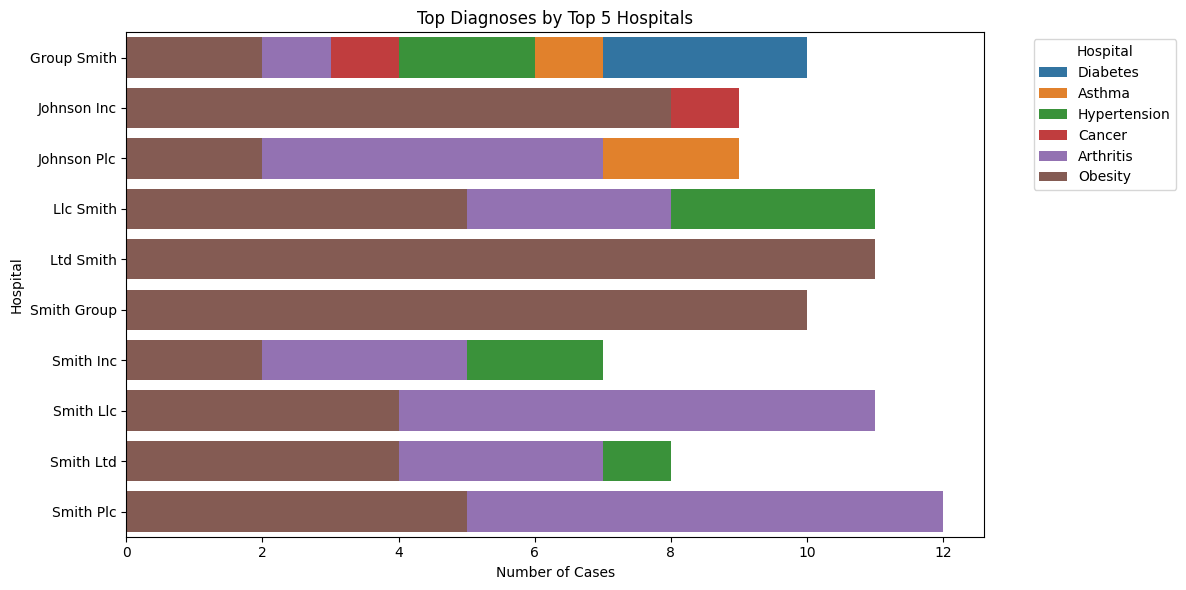

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


common_diagnoses_top = data_cleaned.groupby(['Hospital', 'Medical Condition']).size().reset_index(name='count')

# Sort by Hospital and count
common_diagnoses_top = common_diagnoses_top.sort_values(['Hospital', 'count'], ascending=[True, False])

# Filter top 5 hospitals
top_hospitals = common_diagnoses_top.groupby('Hospital')['count'].sum().nlargest(10).index
filtered_conditions = common_diagnoses_top[common_diagnoses_top['Hospital'].isin(top_hospitals)]

# Sort filtered conditions by count in ascending order
# filtered_conditions = filtered_conditions.sort_values('count', ascending=True)

# Group by Hospital and print counts
for Hospital, group in filtered_conditions.groupby('Hospital'):
    print(f"\nHospital: {Hospital}")
    print(group[['Medical Condition', 'count']].to_string(index=False))


# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=filtered_conditions,
    x='count',
    y='Hospital',
    hue='Medical Condition',
    dodge=False
)
plt.title("Top Diagnoses by Top 5 Hospitals")
plt.xlabel("Number of Cases")
plt.ylabel("Hospital")
plt.legend(title="Hospital", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [24]:
# Assuming your dataset is in 'data_cleaned'

# Define the possible outcomes
outcomes = ['Discharged', 'Inclusive', 'Responding to Treatment', 'Died']

# Assign random outcomes to each row in the dataset
np.random.seed(42)  # For reproducibility
data_cleaned['Outcome'] = np.random.choice(outcomes, size=len(data_cleaned))

# Define a function to assign success rates based on the Outcome
def assign_success_rate(Outcome):
    if Outcome == 'Discharged':
        return np.random.randint(85, 101)  # Random integer between 85 and 100 (inclusive)
    elif Outcome == 'Inclusive':
        return np.random.randint(70, 86)  # Random integer between 70 and 85 (inclusive)
    elif Outcome == 'Responding to Treatment':
        return np.random.randint(50, 86)  # Random integer between 50 and 85 (inclusive)
    elif Outcome == 'Died':
        return 0  # No success rate for patients who died

# Apply the function to assign success rates
data_cleaned['Success Rate'] = data_cleaned['Outcome'].apply(assign_success_rate)

# Show the first few rows of the dataset to verify
print(data_cleaned[['Outcome', 'Success Rate']].head())
data_cleaned

                   Outcome  Success Rate
0  Responding to Treatment            65
1                     Died             0
2               Discharged            98
3  Responding to Treatment            79
4  Responding to Treatment            54


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Month,Year,Healing Time (Days),Outcome,Success Rate
0,Bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Chemotherapy,Normal,January,2024,2,Responding to Treatment,65
1,Leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Appetite Suppressants,Inconclusive,August,2019,6,Died,0
2,Danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.10,205,Emergency,2022-10-07,Appetite Suppressants,Normal,September,2022,15,Discharged,98
3,Andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.78,450,Elective,2020-12-18,Insulin,Abnormal,November,2020,30,Responding to Treatment,79
4,Adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,2022-10-09,Chemotherapy,Abnormal,September,2022,20,Responding to Treatment,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,Elizabeth jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.71,417,Elective,2020-09-15,Inhaler,Abnormal,August,2020,30,Responding to Treatment,62
54962,Kyle perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.80,316,Elective,2020-02-01,Appetite Suppressants,Normal,January,2020,9,Discharged,98
54963,Heather wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs Dvm,"And Mahoney Johnson Vasquez,",Unitedhealthcare,27620.76,347,Urgent,2020-08-10,Diuretics (Water Pills),Abnormal,July,2020,28,Responding to Treatment,61
54964,Jennifer jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd And Castro,",Medicare,32451.09,321,Elective,2019-05-31,Nonsteroidal Anti-Inflammatory Drugs (NSAIDs),Abnormal,May,2019,6,Inclusive,78


In [25]:

data_cleaned.to_csv("cleaned_healthcare_dataset.csv", index=False)

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
data_cleaned = pd.read_csv("cleaned_healthcare_dataset.csv")
data_cleaned

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Month,Year,Healing Time (Days),Outcome,Success Rate
0,Bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Chemotherapy,Normal,January,2024,2,Responding to Treatment,65
1,Leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Appetite Suppressants,Inconclusive,August,2019,6,Died,0
2,Danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.10,205,Emergency,2022-10-07,Appetite Suppressants,Normal,September,2022,15,Discharged,98
3,Andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.78,450,Elective,2020-12-18,Insulin,Abnormal,November,2020,30,Responding to Treatment,79
4,Adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,2022-10-09,Chemotherapy,Abnormal,September,2022,20,Responding to Treatment,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,Elizabeth jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.71,417,Elective,2020-09-15,Inhaler,Abnormal,August,2020,30,Responding to Treatment,62
54962,Kyle perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.80,316,Elective,2020-02-01,Appetite Suppressants,Normal,January,2020,9,Discharged,98
54963,Heather wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs Dvm,"And Mahoney Johnson Vasquez,",Unitedhealthcare,27620.76,347,Urgent,2020-08-10,Diuretics (Water Pills),Abnormal,July,2020,28,Responding to Treatment,61
54964,Jennifer jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd And Castro,",Medicare,32451.09,321,Elective,2019-05-31,Nonsteroidal Anti-Inflammatory Drugs (NSAIDs),Abnormal,May,2019,6,Inclusive,78



Hospital: Died
Medical Condition  count
         Diabetes   2346
     Hypertension   2324
          Obesity   2299
        Arthritis   2277
           Asthma   2250
           Cancer   2248

Hospital: Discharged
Medical Condition  count
           Cancer   2415
          Obesity   2310
     Hypertension   2309
        Arthritis   2300
         Diabetes   2266
           Asthma   2258

Hospital: Inclusive
Medical Condition  count
        Arthritis   2325
     Hypertension   2303
           Asthma   2280
         Diabetes   2276
          Obesity   2267
           Cancer   2201

Hospital: Responding to Treatment
Medical Condition  count
         Diabetes   2328
        Arthritis   2316
           Asthma   2307
           Cancer   2276
          Obesity   2270
     Hypertension   2215


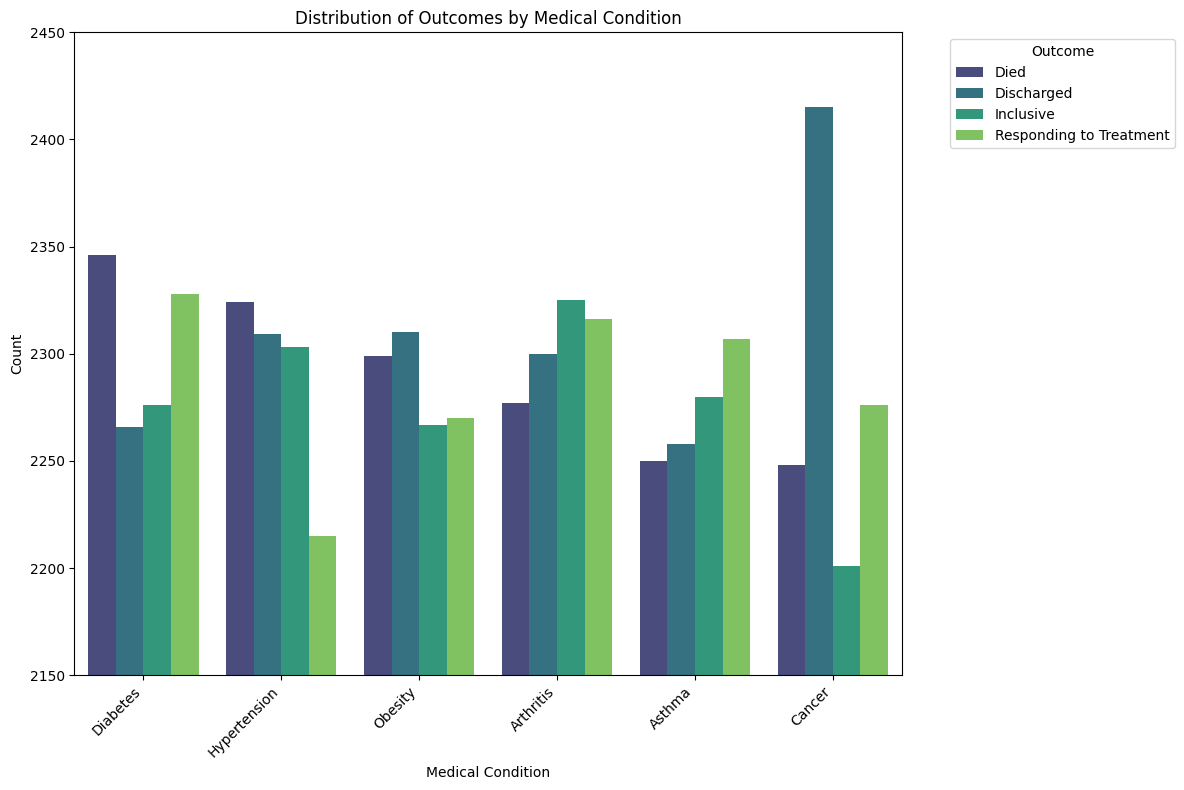

In [28]:
# Count occurrences of each outcome per medical condition
outcome_counts = data_cleaned.groupby(['Medical Condition', 'Outcome']).size().reset_index(name='count')

# Sort by Outcome and count
outcome_counts = outcome_counts.sort_values(['Outcome', 'count'], ascending=[True, False])

# Filter top 5 hospitals
top_outcomes = outcome_counts.groupby('Outcome')['count'].mean().index
filtered_condition = outcome_counts[outcome_counts['Outcome'].isin(top_outcomes)]

# Sort filtered conditions by count in ascending order
# filtered_condition = filtered_condition.sort_values('count', ascending=True)

for Outcome, group in filtered_condition.groupby('Outcome'):
    print(f"\nHospital: {Outcome}")
    print(group[['Medical Condition', 'count']].to_string(index=False))

# Plot grouped bar chart using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(
    data=outcome_counts,
    x='Medical Condition',
    y='count',
    hue='Outcome',
    palette='viridis'
)

# Customize the plot
plt.title("Distribution of Outcomes by Medical Condition")
plt.xlabel("Medical Condition")
plt.ylabel("Count")
plt.ylim(2150, 2450)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title="Outcome", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

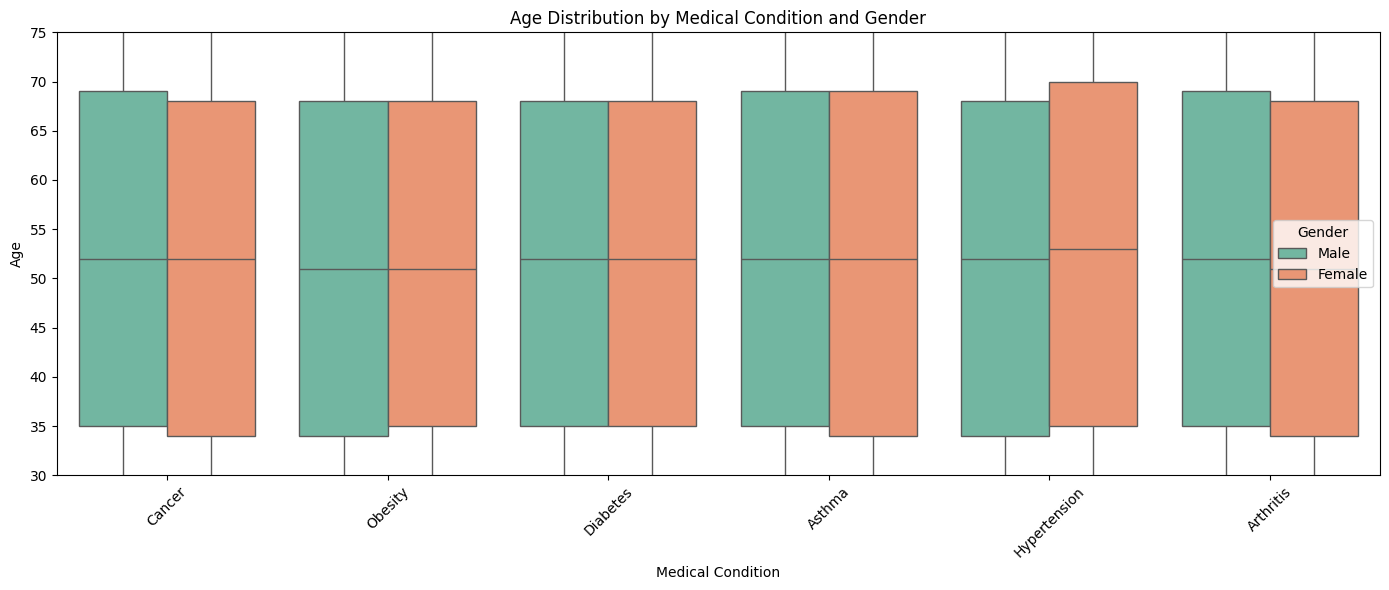

   Medical Condition  Gender    Age Group  count
0          Arthritis  Female        Child     10
1          Arthritis  Female      Elderly   2446
2          Arthritis  Female  Young Adult   1384
3          Arthritis  Female        Youth    802
4          Arthritis    Male        Child     11
5          Arthritis    Male      Elderly   2449
6          Arthritis    Male  Young Adult   1355
7          Arthritis    Male        Youth    761
8             Asthma  Female        Child     10
9             Asthma  Female      Elderly   2397
10            Asthma  Female  Young Adult   1332
11            Asthma  Female        Youth    772
12            Asthma    Male        Child     10
13            Asthma    Male      Elderly   2430
14            Asthma    Male  Young Adult   1330
15            Asthma    Male        Youth    814
16            Cancer  Female        Child      8
17            Cancer  Female      Elderly   2393
18            Cancer  Female  Young Adult   1373
19            Cancer

In [29]:
# Define Age groups based on ranges
def categorize_age(Age):
    if Age < 18:
        return 'Child'
    elif 18 <= Age < 30:
        return 'Youth'
    elif 30 <= Age < 50:
        return 'Young Adult'
    else:
        return 'Elderly'

# Add an Age group column
data_cleaned['Age Group'] = data_cleaned['Age'].apply(categorize_age)

# Plot Age distribution by condition and gender, grouped by Age categories
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=data_cleaned,
    x='Medical Condition',
    y='Age',
    hue='Gender',
    palette='Set2'
)
plt.title("Age Distribution by Medical Condition and Gender")
plt.xlabel("Medical Condition")
plt.ylabel("Age")
plt.ylim(30, 75)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the Age group counts by medical condition and gender
age_group_counts = data_cleaned.groupby(['Medical Condition', 'Gender', 'Age Group']).size().reset_index(name='count')
print(age_group_counts)

Medical Condition
Obesity         25804.36
Diabetes        25660.48
Asthma          25633.46
Arthritis       25511.78
Hypertension    25503.06
Cancer          25152.32
Name: Billing Amount, dtype: float64


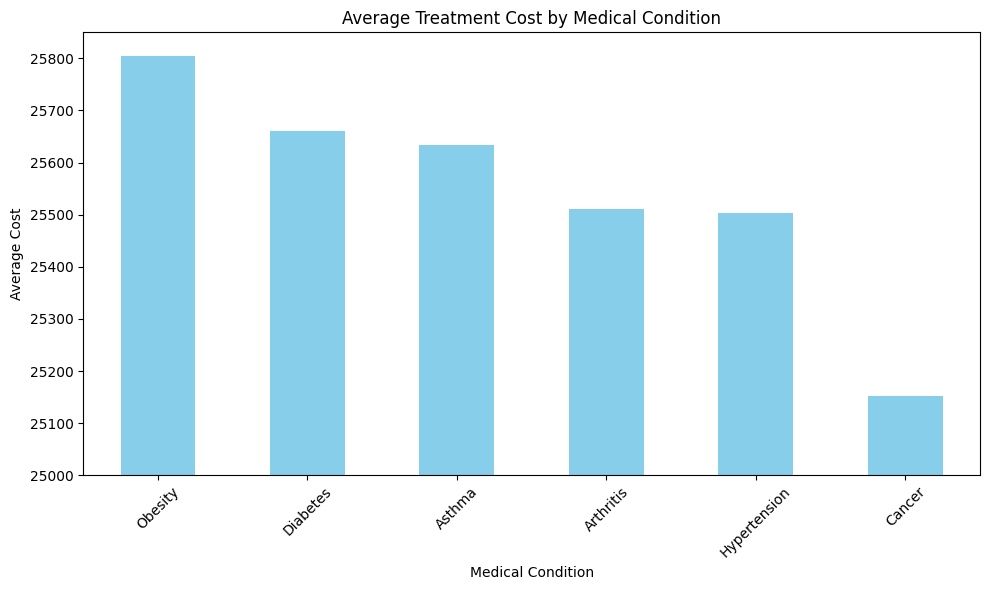

In [30]:
# Average treatment cost per medical condition
avg_cost_condition = data_cleaned.groupby('Medical Condition')['Billing Amount'].mean().sort_values(ascending=False)
print(avg_cost_condition.round(2))
# Plot
plt.figure(figsize=(10, 6))
avg_cost_condition.plot(kind='bar', color='skyblue')
plt.title("Average Treatment Cost by Medical Condition")
plt.xlabel("Medical Condition")
plt.ylabel("Average Cost")
plt.ylim(25000, 25850)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Medical Condition
Asthma          15.68
Arthritis       15.50
Cancer          15.50
Obesity         15.45
Hypertension    15.44
Diabetes        15.43
Name: Healing Time (Days), dtype: float64


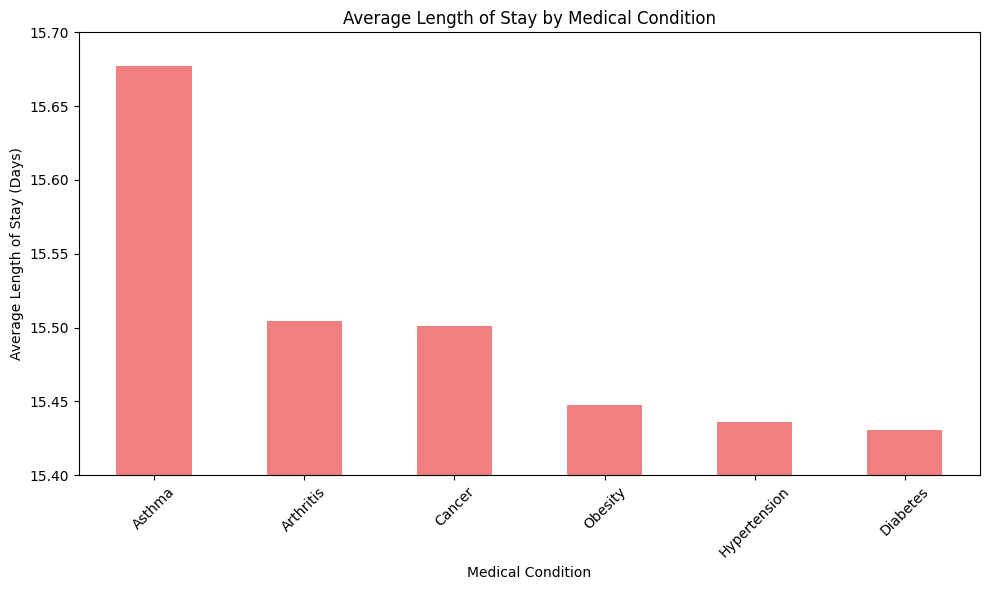

In [31]:


# Average length of stay per medical condition
avg_stay_condition = data_cleaned.groupby('Medical Condition')['Healing Time (Days)'].mean().sort_values(ascending=False)
print(avg_stay_condition.round(2))
# Plot
plt.figure(figsize=(10, 6))
avg_stay_condition.plot(kind='bar', color='lightcoral')
plt.title("Average Length of Stay by Medical Condition")
plt.xlabel("Medical Condition")
plt.ylabel("Average Length of Stay (Days)")
plt.ylim(15.4, 15.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insurance Provider
Medicare            25628.32
Blue Cross          25603.46
Aetna               25549.69
Cigna               25526.00
Unitedhealthcare    25414.51
Name: Billing Amount, dtype: float64


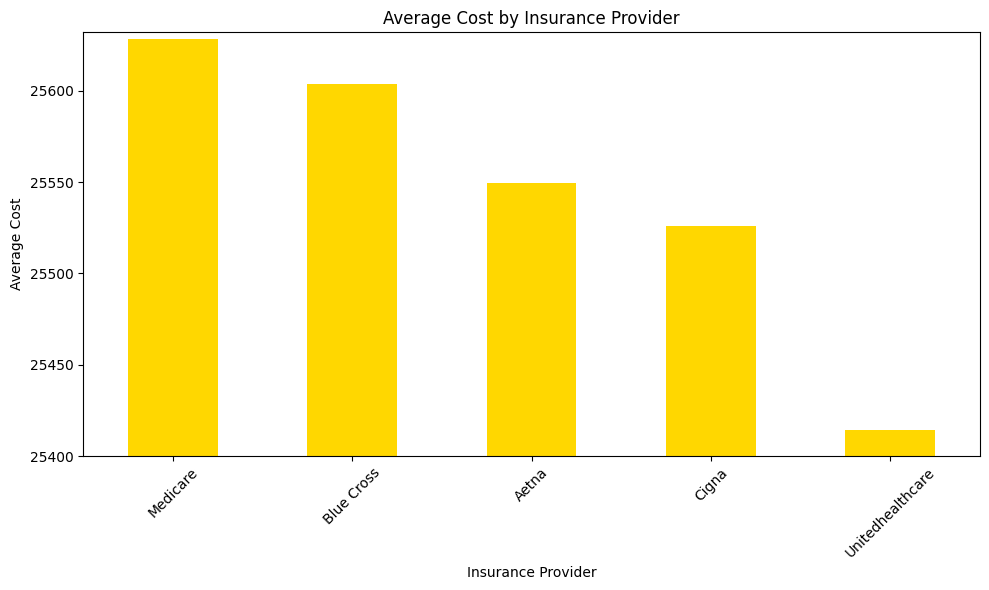

In [32]:
# Average cost by insurance provider
avg_cost_insurance = data_cleaned.groupby('Insurance Provider')['Billing Amount'].mean().sort_values(ascending=False)
print(avg_cost_insurance.round(2))
# Plot
plt.figure(figsize=(10, 6))
avg_cost_insurance.plot(kind='bar', color='gold')
plt.title("Average Cost by Insurance Provider")
plt.xlabel("Insurance Provider")
plt.ylabel("Average Cost")
plt.ylim(25400, 25632)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Gender             Female  Male
Medical Condition              
Arthritis            4642  4576
Asthma               4511  4584
Cancer               4566  4574
Diabetes             4609  4607
Hypertension         4569  4582
Obesity              4573  4573


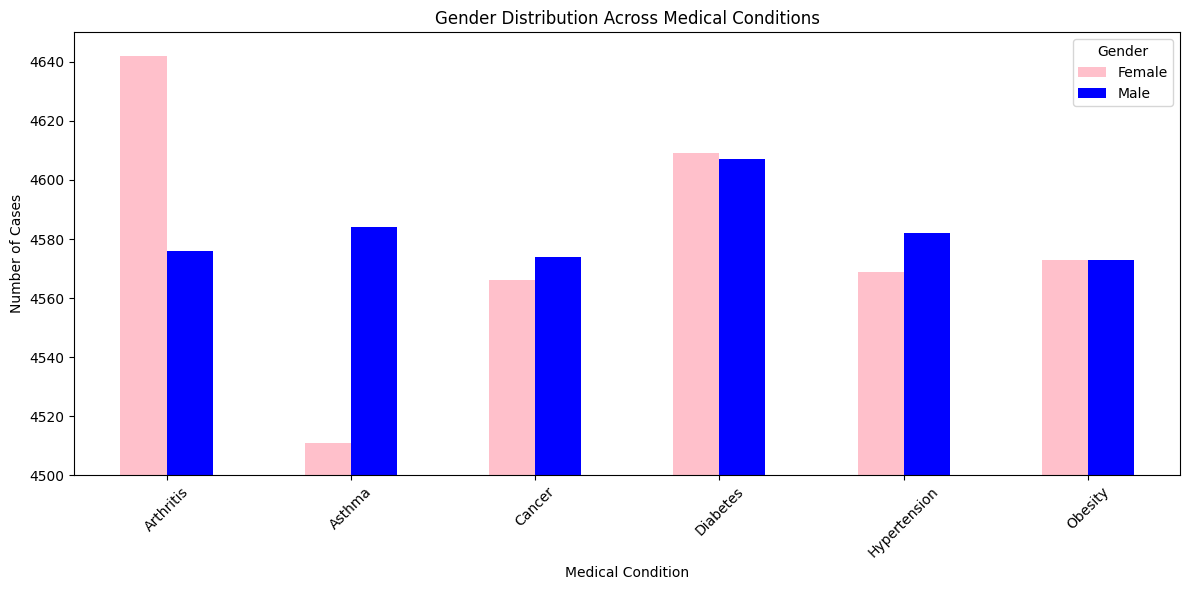

In [33]:
# Count of medical conditions by gender
gender_conditions = data_cleaned.groupby(['Medical Condition', 'Gender']).size().unstack(fill_value=0)
print(gender_conditions)
# Plot
gender_conditions.plot(kind='bar', figsize=(12, 6), color=['pink', 'blue'])
plt.title("Gender Distribution Across Medical Conditions")
plt.xlabel("Medical Condition")
plt.ylabel("Number of Cases")
plt.ylim(4500, 4650)
plt.legend(title="Gender", labels=["Female", "Male"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

                      Age  Healing Time (Days)  Billing Amount
Age                  1.00                 0.01            -0.0
Healing Time (Days)  0.01                 1.00            -0.0
Billing Amount      -0.00                -0.00             1.0


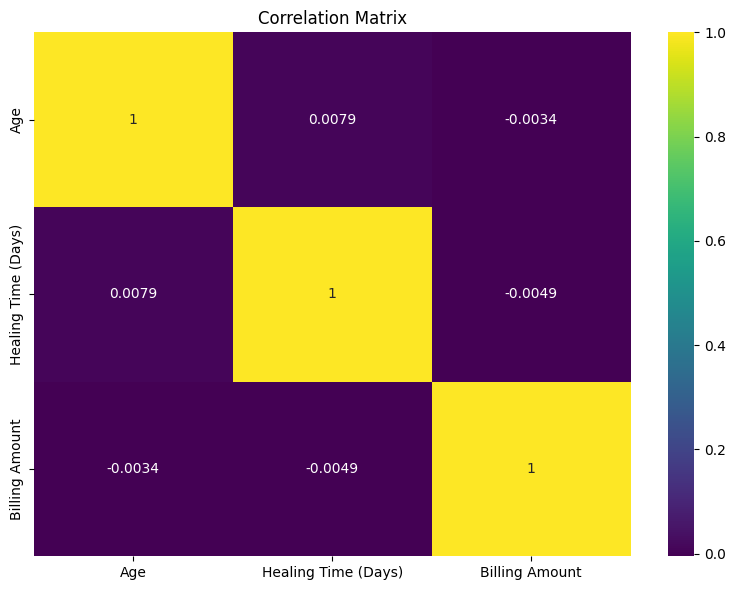

In [34]:
# Correlation heatmap for numerical data
correlation_data = data_cleaned[['Age', 'Healing Time (Days)', 'Billing Amount']].corr()
print(correlation_data.round(2))
# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='viridis')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

Admission Type
Elective     18473
Urgent       18391
Emergency    18102
Name: count, dtype: int64


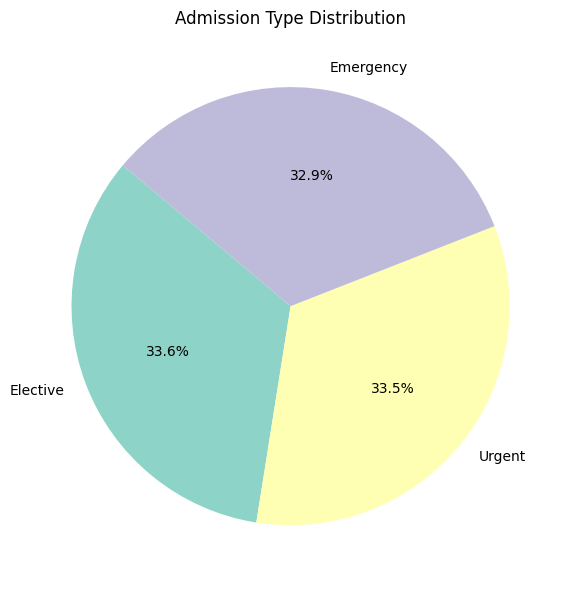

In [35]:
admission_counts = data_cleaned['Admission Type'].value_counts()
print(admission_counts)
# Plot
plt.figure(figsize=(8, 6))
admission_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title("Admission Type Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [36]:

data_cleaned.to_csv("cleaned_healthcare_dataset.csv", index=False)

In [37]:
import pandas as pd
import numpy as np
data = pd.read_csv("cleaned_healthcare_dataset.csv")
data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Admission Type,Discharge Date,Medication,Test Results,Month,Year,Healing Time (Days),Outcome,Success Rate,Age Group
0,Bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.28,...,Urgent,2024-02-02,Chemotherapy,Normal,January,2024,2,Responding to Treatment,65,Young Adult
1,Leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,...,Emergency,2019-08-26,Appetite Suppressants,Inconclusive,August,2019,6,Died,0,Elderly
2,Danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.10,...,Emergency,2022-10-07,Appetite Suppressants,Normal,September,2022,15,Discharged,98,Elderly
3,Andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.78,...,Elective,2020-12-18,Insulin,Abnormal,November,2020,30,Responding to Treatment,79,Youth
4,Adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,...,Urgent,2022-10-09,Chemotherapy,Abnormal,September,2022,20,Responding to Treatment,54,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,Elizabeth jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.71,...,Elective,2020-09-15,Inhaler,Abnormal,August,2020,30,Responding to Treatment,62,Young Adult
54962,Kyle perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.80,...,Elective,2020-02-01,Appetite Suppressants,Normal,January,2020,9,Discharged,98,Elderly
54963,Heather wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs Dvm,"And Mahoney Johnson Vasquez,",Unitedhealthcare,27620.76,...,Urgent,2020-08-10,Diuretics (Water Pills),Abnormal,July,2020,28,Responding to Treatment,61,Young Adult
54964,Jennifer jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd And Castro,",Medicare,32451.09,...,Elective,2019-05-31,Nonsteroidal Anti-Inflammatory Drugs (NSAIDs),Abnormal,May,2019,6,Inclusive,78,Young Adult


In [38]:
data["Patient_id"] = range(1,54967)

In [40]:
data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Discharge Date,Medication,Test Results,Month,Year,Healing Time (Days),Outcome,Success Rate,Age Group,Patient_id
0,Bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.28,...,2024-02-02,Chemotherapy,Normal,January,2024,2,Responding to Treatment,65,Young Adult,1
1,Leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,...,2019-08-26,Appetite Suppressants,Inconclusive,August,2019,6,Died,0,Elderly,2
2,Danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.10,...,2022-10-07,Appetite Suppressants,Normal,September,2022,15,Discharged,98,Elderly,3
3,Andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.78,...,2020-12-18,Insulin,Abnormal,November,2020,30,Responding to Treatment,79,Youth,4
4,Adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,...,2022-10-09,Chemotherapy,Abnormal,September,2022,20,Responding to Treatment,54,Young Adult,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,Elizabeth jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.71,...,2020-09-15,Inhaler,Abnormal,August,2020,30,Responding to Treatment,62,Young Adult,54962
54962,Kyle perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.80,...,2020-02-01,Appetite Suppressants,Normal,January,2020,9,Discharged,98,Elderly,54963
54963,Heather wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs Dvm,"And Mahoney Johnson Vasquez,",Unitedhealthcare,27620.76,...,2020-08-10,Diuretics (Water Pills),Abnormal,July,2020,28,Responding to Treatment,61,Young Adult,54964
54964,Jennifer jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd And Castro,",Medicare,32451.09,...,2019-05-31,Nonsteroidal Anti-Inflammatory Drugs (NSAIDs),Abnormal,May,2019,6,Inclusive,78,Young Adult,54965


In [7]:
data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Discharge Date,Medication,Test Results,Month,Year,Healing Time (Days),Outcome,Success Rate,Age Group,Patient_id
0,Bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28,...,2024-02-02,Chemotherapy,Normal,January,2024,2,Responding to Treatment,65,Young Adult,1
1,Leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,...,2019-08-26,Appetite Suppressants,Inconclusive,August,2019,6,Died,0,Elderly,2
2,Danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.10,...,2022-10-07,Appetite Suppressants,Normal,September,2022,15,Discharged,98,Elderly,3
3,Andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78,...,2020-12-18,Insulin,Abnormal,November,2020,30,Responding to Treatment,79,Youth,4
4,Adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,...,2022-10-09,Chemotherapy,Abnormal,September,2022,20,Responding to Treatment,54,Young Adult,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,Elizabeth jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.71,...,2020-09-15,Inhaler,Abnormal,August,2020,30,Responding to Treatment,62,Young Adult,54962
54962,Kyle perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.80,...,2020-02-01,Appetite Suppressants,Normal,January,2020,9,Discharged,98,Elderly,54963
54963,Heather wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.76,...,2020-08-10,Diuretics (Water Pills),Abnormal,July,2020,28,Responding to Treatment,61,Young Adult,54964
54964,Jennifer jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.09,...,2019-05-31,Nonsteroidal Anti-Inflammatory Drugs (NSAIDs),Abnormal,May,2019,6,Inclusive,78,Young Adult,54965


In [9]:

data.to_csv("cleaned_healthcare_dataset.csv", index=False)

In [41]:
# Assuming your dataset is in 'data'

# Define the possible outcomes
outcomes = ['Discharged', 'Inclusive', 'Responding to Treatment', 'Died']

# Assign random outcomes to each row in the dataset
np.random.seed(42)  # For reproducibility
data['Outcome'] = np.random.choice(outcomes, size=len(data))

# Define a function to assign success rates based on the Outcome
def assign_success_rate(Outcome):
    if Outcome == 'Discharged':
        return 3  # Random integer between 85 and 100 (inclusive)
    elif Outcome == 'Inclusive':
        return 2  # Random integer between 70 and 85 (inclusive)
    elif Outcome == 'Responding to Treatment':
        return 1  # Random integer between 50 and 85 (inclusive)
    elif Outcome == 'Died':
        return 0  # No success rate for patients who died

# Apply the function to assign success rates
data['Success Rate Code'] = data['Outcome'].apply(assign_success_rate)

# Show the first few rows of the dataset to verify
print(data[['Outcome', 'Success Rate Code']].head())
data

                   Outcome  Success Rate Code
0  Responding to Treatment                  1
1                     Died                  0
2               Discharged                  3
3  Responding to Treatment                  1
4  Responding to Treatment                  1


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Medication,Test Results,Month,Year,Healing Time (Days),Outcome,Success Rate,Age Group,Patient_id,Success Rate Code
0,Bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.28,...,Chemotherapy,Normal,January,2024,2,Responding to Treatment,65,Young Adult,1,1
1,Leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,...,Appetite Suppressants,Inconclusive,August,2019,6,Died,0,Elderly,2,0
2,Danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.10,...,Appetite Suppressants,Normal,September,2022,15,Discharged,98,Elderly,3,3
3,Andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.78,...,Insulin,Abnormal,November,2020,30,Responding to Treatment,79,Youth,4,1
4,Adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,...,Chemotherapy,Abnormal,September,2022,20,Responding to Treatment,54,Young Adult,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,Elizabeth jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.71,...,Inhaler,Abnormal,August,2020,30,Responding to Treatment,62,Young Adult,54962,1
54962,Kyle perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.80,...,Appetite Suppressants,Normal,January,2020,9,Discharged,98,Elderly,54963,3
54963,Heather wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs Dvm,"And Mahoney Johnson Vasquez,",Unitedhealthcare,27620.76,...,Diuretics (Water Pills),Abnormal,July,2020,28,Responding to Treatment,61,Young Adult,54964,1
54964,Jennifer jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd And Castro,",Medicare,32451.09,...,Nonsteroidal Anti-Inflammatory Drugs (NSAIDs),Abnormal,May,2019,6,Inclusive,78,Young Adult,54965,2


In [5]:
data.to_csv("cleaned_healthcare_dataset.csv", index=False)

In [42]:
# Assuming your dataset is in 'data'

# Define the possible outcomes
outcomes = ['Discharged', 'Inclusive', 'Responding to Treatment', 'Died']

# Assign random outcomes to each row in the dataset
np.random.seed(42)  # For reproducibility
data['Outcome'] = np.random.choice(outcomes, size=len(data))

# Define a function to assign success rates based on the Outcome
def assign_success_rate(Outcome):
    if Outcome == 'Discharged':
        return np.random.randint(75, 101)  # Random integer between 85 and 100 (inclusive)
    elif Outcome == 'Inclusive':
        return np.random.randint(50, 76)  # Random integer between 70 and 85 (inclusive)
    elif Outcome == 'Responding to Treatment':
        return np.random.randint(25, 51)  # Random integer between 50 and 85 (inclusive)
    elif Outcome == 'Died':
        return np.random.randint(0, 26) # No success rate for patients who died

# Apply the function to assign success rates
data['Success Rate'] = data['Outcome'].apply(assign_success_rate)

# Show the first few rows of the dataset to verify
print(data[['Outcome', 'Success Rate']].head())
data

                   Outcome  Success Rate
0  Responding to Treatment            40
1                     Died            21
2               Discharged            79
3  Responding to Treatment            25
4  Responding to Treatment            43


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Medication,Test Results,Month,Year,Healing Time (Days),Outcome,Success Rate,Age Group,Patient_id,Success Rate Code
0,Bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.28,...,Chemotherapy,Normal,January,2024,2,Responding to Treatment,40,Young Adult,1,1
1,Leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,...,Appetite Suppressants,Inconclusive,August,2019,6,Died,21,Elderly,2,0
2,Danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.10,...,Appetite Suppressants,Normal,September,2022,15,Discharged,79,Elderly,3,3
3,Andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.78,...,Insulin,Abnormal,November,2020,30,Responding to Treatment,25,Youth,4,1
4,Adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,...,Chemotherapy,Abnormal,September,2022,20,Responding to Treatment,43,Young Adult,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,Elizabeth jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.71,...,Inhaler,Abnormal,August,2020,30,Responding to Treatment,25,Young Adult,54962,1
54962,Kyle perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.80,...,Appetite Suppressants,Normal,January,2020,9,Discharged,99,Elderly,54963,3
54963,Heather wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs Dvm,"And Mahoney Johnson Vasquez,",Unitedhealthcare,27620.76,...,Diuretics (Water Pills),Abnormal,July,2020,28,Responding to Treatment,49,Young Adult,54964,1
54964,Jennifer jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd And Castro,",Medicare,32451.09,...,Nonsteroidal Anti-Inflammatory Drugs (NSAIDs),Abnormal,May,2019,6,Inclusive,52,Young Adult,54965,2


In [11]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.0 MB 2.4 MB/s eta 0:00:05
   ----- ---------------------------------- 1.6/11.0 MB 3.2 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/11.0 MB 4.0 MB/s eta 0:00:02
   ------------- -------------------------- 3.7/11.0 MB 4.4 MB/s eta 0:00:02
   ------------- -------------------------- 3.7/11.0 MB 4.4 MB/s eta 0:00:02
   ---------------------- ----------------- 6.0/11.0 MB 4.6 MB/s eta 0:00:02
   ------------------------- -------------- 7.1/11.0 MB 4.6 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.0 MB 4.6 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.0 MB 4.6 MB/s eta 0:00:01
   ---------------------------------- ----- 9.4/11.0 MB 4.5 MB/s eta 0:00:01
   ------------------------------------- -- 10.2/11.0 MB 4.4 MB/s eta 0:00:01
   ---------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [45]:
# data = data.drop(columns=['Name', 'Patient_id'])  # Replace with actual column names

from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoder = LabelEncoder()
data['Admission Type Code'] = label_encoder.fit_transform(data['Admission Type'])
data['Medical Condition Code'] = label_encoder.fit_transform(data['Medical Condition'])

In [46]:
data['Outcome Code'] = label_encoder.fit_transform(data['Outcome'])

In [47]:
data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Year,Healing Time (Days),Outcome,Success Rate,Age Group,Patient_id,Success Rate Code,Admission Type Code,Medical Condition Code,Outcome Code
0,Bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.28,...,2024,2,Responding to Treatment,40,Young Adult,1,1,2,2,3
1,Leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,...,2019,6,Died,21,Elderly,2,0,1,5,0
2,Danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.10,...,2022,15,Discharged,79,Elderly,3,3,1,5,1
3,Andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.78,...,2020,30,Responding to Treatment,25,Youth,4,1,0,3,3
4,Adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,...,2022,20,Responding to Treatment,43,Young Adult,5,1,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,Elizabeth jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.71,...,2020,30,Responding to Treatment,25,Young Adult,54962,1,0,1,3
54962,Kyle perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.80,...,2020,9,Discharged,99,Elderly,54963,3,0,5,1
54963,Heather wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs Dvm,"And Mahoney Johnson Vasquez,",Unitedhealthcare,27620.76,...,2020,28,Responding to Treatment,49,Young Adult,54964,1,2,4,3
54964,Jennifer jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd And Castro,",Medicare,32451.09,...,2019,6,Inclusive,52,Young Adult,54965,2,0,0,2


In [49]:
data.to_csv("cleaned_healthcare_dataset.csv", index=False)

In [50]:
data = pd.get_dummies(data, columns=['Admission Type', 'Medical Condition'], drop_first=True)


In [64]:
import pandas as pd
import numpy as np
data = pd.read_csv("cleaned_healthcare_dataset.csv")
data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Year,Healing Time (Days),Outcome,Success Rate,Age Group,Patient_id,Success Rate Code,Admission Type Code,Medical Condition Code,Outcome Code
0,Bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.28,...,2024,2,Responding to Treatment,40,Young Adult,1,1,2,2,3
1,Leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,...,2019,6,Died,21,Elderly,2,0,1,5,0
2,Danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.10,...,2022,15,Discharged,79,Elderly,3,3,1,5,1
3,Andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.78,...,2020,30,Responding to Treatment,25,Youth,4,1,0,3,3
4,Adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,...,2022,20,Responding to Treatment,43,Young Adult,5,1,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,Elizabeth jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.71,...,2020,30,Responding to Treatment,25,Young Adult,54962,1,0,1,3
54962,Kyle perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.80,...,2020,9,Discharged,99,Elderly,54963,3,0,5,1
54963,Heather wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs Dvm,"And Mahoney Johnson Vasquez,",Unitedhealthcare,27620.76,...,2020,28,Responding to Treatment,49,Young Adult,54964,1,2,4,3
54964,Jennifer jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd And Castro,",Medicare,32451.09,...,2019,6,Inclusive,52,Young Adult,54965,2,0,0,2


In [65]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

In [66]:
data["Age"].isnull().sum()

np.int64(0)

In [67]:
# Feature Selection
features = ['Age', 'Admission Type Code', 'Medical Condition Code']  # Replace with relevant columns
target = 'Outcome'  # Assuming the dataset has a column for patient outcomes

# Convert categorical features to numeric using one-hot encoding
data_encoded = pd.get_dummies(data, columns=features, drop_first=True)

# Splitting data into features (X) and target variable (y)
X = data_encoded.drop(columns=[target])
y = data_encoded[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Make predictions
# y_pred = model.predict(X_test)

In [68]:
data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Year,Healing Time (Days),Outcome,Success Rate,Age Group,Patient_id,Success Rate Code,Admission Type Code,Medical Condition Code,Outcome Code
0,Bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.28,...,2024,2,Responding to Treatment,40,Young Adult,1,1,2,2,3
1,Leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,...,2019,6,Died,21,Elderly,2,0,1,5,0
2,Danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.10,...,2022,15,Discharged,79,Elderly,3,3,1,5,1
3,Andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.78,...,2020,30,Responding to Treatment,25,Youth,4,1,0,3,3
4,Adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,...,2022,20,Responding to Treatment,43,Young Adult,5,1,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,Elizabeth jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.71,...,2020,30,Responding to Treatment,25,Young Adult,54962,1,0,1,3
54962,Kyle perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.80,...,2020,9,Discharged,99,Elderly,54963,3,0,5,1
54963,Heather wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs Dvm,"And Mahoney Johnson Vasquez,",Unitedhealthcare,27620.76,...,2020,28,Responding to Treatment,49,Young Adult,54964,1,2,4,3
54964,Jennifer jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd And Castro,",Medicare,32451.09,...,2019,6,Inclusive,52,Young Adult,54965,2,0,0,2


In [70]:


# Define the logistic regression coefficients
intercept = -1.5  # Replace with the actual intercept from your model
age_coeff = 0.02  # Replace with the coefficient for Age
diagnosis_coeff = -0.5  # Replace with the coefficient for Medical Condition Code (or relevant variable)

# Ensure Medical Condition Code and Age are numeric (if not, encode or clean them)
data['Medical Condition Code'] = pd.to_numeric(data['Medical Condition Code'], errors='coerce')
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Drop rows with NaN (if any) after converting columns to numeric
data = data.dropna(subset=['Age', 'Medical Condition Code'])

# Logistic Regression Formula: Predicted Outcome
data['Predicted Outcome'] = 1 / (1 + np.exp(-(intercept + data['Age'] * age_coeff + data['Medical Condition Code'] * diagnosis_coeff)))

# Display the results
print("Dataset with Predicted Outcome:")
print(data[['Age', 'Medical Condition Code', 'Predicted Outcome']].head())

# Save the updated dataset
output_path = '/mnt/data/dataset_with_predicted_outcomes.csv'
data.to_csv("output_path.csv", index=False)
print(f"Updated dataset saved to: {output_path}")
data

Dataset with Predicted Outcome:
   Age  Medical Condition Code  Predicted Outcome
0   30                       2           0.130108
1   62                       5           0.059524
2   76                       5           0.077272
3   28                       3           0.080173
4   43                       2           0.162465
Updated dataset saved to: /mnt/data/dataset_with_predicted_outcomes.csv


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Healing Time (Days),Outcome,Success Rate,Age Group,Patient_id,Success Rate Code,Admission Type Code,Medical Condition Code,Outcome Code,Predicted Outcome
0,Bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.28,...,2,Responding to Treatment,40,Young Adult,1,1,2,2,3,0.130108
1,Leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,...,6,Died,21,Elderly,2,0,1,5,0,0.059524
2,Danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.10,...,15,Discharged,79,Elderly,3,3,1,5,1,0.077272
3,Andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.78,...,30,Responding to Treatment,25,Youth,4,1,0,3,3,0.080173
4,Adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,...,20,Responding to Treatment,43,Young Adult,5,1,2,2,3,0.162465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,Elizabeth jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.71,...,30,Responding to Treatment,25,Young Adult,54962,1,0,1,3,0.238667
54962,Kyle perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.80,...,9,Discharged,99,Elderly,54963,3,0,5,1,0.058415
54963,Heather wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs Dvm,"And Mahoney Johnson Vasquez,",Unitedhealthcare,27620.76,...,28,Responding to Treatment,49,Young Adult,54964,1,2,4,3,0.060654
54964,Jennifer jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd And Castro,",Medicare,32451.09,...,6,Inclusive,52,Young Adult,54965,2,0,0,2,0.345247


In [71]:
data.to_csv("output_new.csv", index=False)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54966 entries, 0 to 54965
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    54966 non-null  object 
 1   Age                     54966 non-null  int64  
 2   Gender                  54966 non-null  object 
 3   Blood Type              54966 non-null  object 
 4   Medical Condition       54966 non-null  object 
 5   Date of Admission       54966 non-null  object 
 6   Doctor                  54966 non-null  object 
 7   Hospital                54966 non-null  object 
 8   Insurance Provider      54966 non-null  object 
 9   Billing Amount          54966 non-null  float64
 10  Room Number             54966 non-null  int64  
 11  Admission Type          54966 non-null  object 
 12  Discharge Date          54966 non-null  object 
 13  Medication              54966 non-null  object 
 14  Test Results            54966 non-null

In [73]:


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Ensure data is clean and numeric
data['Medical Condition Code'] = pd.to_numeric(data['Medical Condition Code'], errors='coerce')
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data = data.dropna(subset=['Age', 'Medical Condition Code', 'Outcome'])  # Assuming 'Outcome' is the target variable

# Define features and target variable
X = data[['Age', 'Medical Condition Code']]  # Replace with actual relevant columns
y = data['Outcome']  # Binary target variable (0 or 1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict on the test set
y_pred = log_model.predict(X_test)

# Evaluate the model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
data

Model Accuracy: 0.25259232308531926

Classification Report:
                         precision    recall  f1-score   support

                   Died       0.26      0.27      0.27      2753
             Discharged       0.27      0.12      0.17      2833
              Inclusive       0.24      0.23      0.23      2707
Responding to Treatment       0.25      0.40      0.31      2701

               accuracy                           0.25     10994
              macro avg       0.25      0.25      0.24     10994
           weighted avg       0.26      0.25      0.24     10994



,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Healing Time (Days),Outcome,Success Rate,Age Group,Patient_id,Success Rate Code,Admission Type Code,Medical Condition Code,Outcome Code,Predicted Outcome
0,Bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.28,...,2,Responding to Treatment,40,Young Adult,1,1,2,2,3,0.130108
1,Leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,...,6,Died,21,Elderly,2,0,1,5,0,0.059524
2,Danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.10,...,15,Discharged,79,Elderly,3,3,1,5,1,0.077272
3,Andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.78,...,30,Responding to Treatment,25,Youth,4,1,0,3,3,0.080173
4,Adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,...,20,Responding to Treatment,43,Young Adult,5,1,2,2,3,0.162465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,Elizabeth jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.71,...,30,Responding to Treatment,25,Young Adult,54962,1,0,1,3,0.238667
54962,Kyle perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.80,...,9,Discharged,99,Elderly,54963,3,0,5,1,0.058415
54963,Heather wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs Dvm,"And Mahoney Johnson Vasquez,",Unitedhealthcare,27620.76,...,28,Responding to Treatment,49,Young Adult,54964,1,2,4,3,0.060654
54964,Jennifer jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd And Castro,",Medicare,32451.09,...,6,Inclusive,52,Young Adult,54965,2,0,0,2,0.345247


In [74]:

print(data.info())
print(data.isnull().sum())  # Check for missing values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54966 entries, 0 to 54965
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    54966 non-null  object 
 1   Age                     54966 non-null  int64  
 2   Gender                  54966 non-null  object 
 3   Blood Type              54966 non-null  object 
 4   Medical Condition       54966 non-null  object 
 5   Date of Admission       54966 non-null  object 
 6   Doctor                  54966 non-null  object 
 7   Hospital                54966 non-null  object 
 8   Insurance Provider      54966 non-null  object 
 9   Billing Amount          54966 non-null  float64
 10  Room Number             54966 non-null  int64  
 11  Admission Type          54966 non-null  object 
 12  Discharge Date          54966 non-null  object 
 13  Medication              54966 non-null  object 
 14  Test Results            54966 non-null

In [75]:
print("Unique values in each column:")
for column in ['Test Results', 'Outcome', 'Medical Condition', 'Admission Type']:
    if column in data.columns:
        print(f"{column}: {data[column].unique()}")


Unique values in each column:
Test Results: ['Normal' 'Inconclusive' 'Abnormal']
Outcome: ['Responding to Treatment' 'Died' 'Discharged' 'Inclusive']
Medical Condition: ['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']
Admission Type: ['Urgent' 'Emergency' 'Elective']


In [76]:
from sklearn.preprocessing import LabelEncoder

# Convert 'Medical Condition' and 'Admission Type' to binary
if 'Medical Condition' in data.columns:
    label_encoder = LabelEncoder()
    data['Medical Condition COde'] = label_encoder.fit_transform(data['Medical Condition'])

if 'Admission Type' in data.columns:
    data['Admission Type Code'] = label_encoder.fit_transform(data['Admission Type'])

In [77]:
data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Outcome,Success Rate,Age Group,Patient_id,Success Rate Code,Admission Type Code,Medical Condition Code,Outcome Code,Predicted Outcome,Medical Condition COde
0,Bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.28,...,Responding to Treatment,40,Young Adult,1,1,2,2,3,0.130108,2
1,Leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,...,Died,21,Elderly,2,0,1,5,0,0.059524,5
2,Danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.10,...,Discharged,79,Elderly,3,3,1,5,1,0.077272,5
3,Andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.78,...,Responding to Treatment,25,Youth,4,1,0,3,3,0.080173,3
4,Adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,...,Responding to Treatment,43,Young Adult,5,1,2,2,3,0.162465,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,Elizabeth jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.71,...,Responding to Treatment,25,Young Adult,54962,1,0,1,3,0.238667,1
54962,Kyle perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.80,...,Discharged,99,Elderly,54963,3,0,5,1,0.058415,5
54963,Heather wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs Dvm,"And Mahoney Johnson Vasquez,",Unitedhealthcare,27620.76,...,Responding to Treatment,49,Young Adult,54964,1,2,4,3,0.060654,4
54964,Jennifer jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd And Castro,",Medicare,32451.09,...,Inclusive,52,Young Adult,54965,2,0,0,2,0.345247,0


In [78]:
data = data.dropna(subset=['Medical Condition Code', 'Outcome Code'])

# Check for unique values in the columns
print("Unique values in Medical Condition Code:", data['Medical Condition Code'].unique())
print("Unique values in Outcome Code:", data['Outcome Code'].unique())

Unique values in Medical Condition Code: [2 5 3 1 4 0]
Unique values in Outcome Code: [3 0 1 2]


In [79]:
# Ensure relevant columns are numeric and handle missing values
data['Medical Condition Code'] = pd.to_numeric(data['Medical Condition Code'], errors='coerce')
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Drop rows with missing values
data = data.dropna(subset=['Age', 'Medical Condition Code', 'Outcome Code'])

# Ensure 'Outcome Code' is binary
data['Outcome Code'] = data['Outcome Code'].apply(lambda x: 1 if x == 1 else 0)

# Convert categorical columns to binary
label_encoder = LabelEncoder()
if 'Admission' in data.columns:
    data['Admission'] = label_encoder.fit_transform(data['Admission'])
if 'Treatment Type' in data.columns:
    data['Treatment Type'] = label_encoder.fit_transform(data['Treatment Type'])

# Verify the dataset after transformations
print("Transformed Dataset Info:")
print(data.info())

# Define features and target variable
X = data[['Age', 'Medical Condition Code']]  # Add more relevant columns if needed
y = data['Outcome Code']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Transformed Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54966 entries, 0 to 54965
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    54966 non-null  object 
 1   Age                     54966 non-null  int64  
 2   Gender                  54966 non-null  object 
 3   Blood Type              54966 non-null  object 
 4   Medical Condition       54966 non-null  object 
 5   Date of Admission       54966 non-null  object 
 6   Doctor                  54966 non-null  object 
 7   Hospital                54966 non-null  object 
 8   Insurance Provider      54966 non-null  object 
 9   Billing Amount          54966 non-null  float64
 10  Room Number             54966 non-null  int64  
 11  Admission Type          54966 non-null  object 
 12  Discharge Date          54966 non-null  object 
 13  Medication              54966 non-null  object 
 14  Test Results

c:\Users\Olayinka\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Olayinka\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Olayinka\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [80]:
data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Outcome,Success Rate,Age Group,Patient_id,Success Rate Code,Admission Type Code,Medical Condition Code,Outcome Code,Predicted Outcome,Medical Condition COde
0,Bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.28,...,Responding to Treatment,40,Young Adult,1,1,2,2,0,0.130108,2
1,Leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,...,Died,21,Elderly,2,0,1,5,0,0.059524,5
2,Danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.10,...,Discharged,79,Elderly,3,3,1,5,1,0.077272,5
3,Andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.78,...,Responding to Treatment,25,Youth,4,1,0,3,0,0.080173,3
4,Adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,...,Responding to Treatment,43,Young Adult,5,1,2,2,0,0.162465,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,Elizabeth jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.71,...,Responding to Treatment,25,Young Adult,54962,1,0,1,0,0.238667,1
54962,Kyle perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.80,...,Discharged,99,Elderly,54963,3,0,5,1,0.058415,5
54963,Heather wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs Dvm,"And Mahoney Johnson Vasquez,",Unitedhealthcare,27620.76,...,Responding to Treatment,49,Young Adult,54964,1,2,4,0,0.060654,4
54964,Jennifer jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd And Castro,",Medicare,32451.09,...,Inclusive,52,Young Adult,54965,2,0,0,0,0.345247,0


In [81]:



# # Define the logistic regression coefficients
# intercept = -1.5  # Replace with the actual intercept from your model
# age_coeff = 0.02  # Replace with the coefficient for Age
# diagnosis_coeff = -0.5  # Replace with the coefficient for Medical Condition Code (or relevant variable)

# # Ensure Medical Condition Code and Age are numeric (if not, encode or clean them)
# data['Medical Condition Code '] = pd.to_numeric(data['Medical Condition Code'], errors='coerce')
# data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# # Drop rows with NaN (if any) after converting columns to numeric
# data = data.dropna(subset=['Age', 'Medical Condition Code'])

# # Logistic Regression Formula: Predicted Outcome
# data['Predicted Outcome'] = 1 / (1 + np.exp(-(intercept + data['Age'] * age_coeff + data['Medical Condition Code'] * diagnosis_coeff)))

# # Display the results
# print("Dataset with Predicted Outcome:")
# print(data[['Age', 'Medical Condition Code', 'Predicted Outcome']].head())

# # Save the updated dataset
# data.to_csv("output_path.csv", index=False)
# data

In [82]:
if 'Predicted Outcome' in data.columns:
    data['Outcome Category'] = data['Predicted Outcome'].apply(
        lambda x: 'Successful' if x > 0.3 else 'Unsuccessful'
    )

# Verify the new column
print(data[['Predicted Outcome', 'Outcome Category']].head())

   Predicted Outcome Outcome Category
0           0.130108     Unsuccessful
1           0.059524     Unsuccessful
2           0.077272     Unsuccessful
3           0.080173     Unsuccessful
4           0.162465     Unsuccessful


In [83]:
data["Outcome Category"].unique()

array(['Unsuccessful', 'Successful'], dtype=object)

In [84]:

# Add a 'Risk Level' column based on 'Predicted Outcome'
if 'Predicted Outcome' in data.columns:
    def assign_risk_level(x):
        if x > 0.5:
            return 'Low Risk'
        elif 0.3 <= x <= 0.5:
            return 'Medium Risk'
        else:
            return 'High Risk'

    # Apply the function to the 'Predicted Outcome' column
    data['Risk Level'] = data['Predicted Outcome'].apply(assign_risk_level)

# Verify the new column
print(data[['Predicted Outcome', 'Risk Level']].head())

   Predicted Outcome Risk Level
0           0.130108  High Risk
1           0.059524  High Risk
2           0.077272  High Risk
3           0.080173  High Risk
4           0.162465  High Risk


In [85]:
data["Risk Level"].unique()

array(['High Risk', 'Medium Risk', 'Low Risk'], dtype=object)

In [86]:
data.to_csv("output_path_new.csv", index=False)


In [87]:
data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Age Group,Patient_id,Success Rate Code,Admission Type Code,Medical Condition Code,Outcome Code,Predicted Outcome,Medical Condition COde,Outcome Category,Risk Level
0,Bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.28,...,Young Adult,1,1,2,2,0,0.130108,2,Unsuccessful,High Risk
1,Leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,...,Elderly,2,0,1,5,0,0.059524,5,Unsuccessful,High Risk
2,Danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.10,...,Elderly,3,3,1,5,1,0.077272,5,Unsuccessful,High Risk
3,Andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.78,...,Youth,4,1,0,3,0,0.080173,3,Unsuccessful,High Risk
4,Adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,...,Young Adult,5,1,2,2,0,0.162465,2,Unsuccessful,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,Elizabeth jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.71,...,Young Adult,54962,1,0,1,0,0.238667,1,Unsuccessful,High Risk
54962,Kyle perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.80,...,Elderly,54963,3,0,5,1,0.058415,5,Unsuccessful,High Risk
54963,Heather wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs Dvm,"And Mahoney Johnson Vasquez,",Unitedhealthcare,27620.76,...,Young Adult,54964,1,2,4,0,0.060654,4,Unsuccessful,High Risk
54964,Jennifer jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd And Castro,",Medicare,32451.09,...,Young Adult,54965,2,0,0,0,0.345247,0,Successful,Medium Risk


In [90]:
if 'Predicted Outcome' in data.columns:
    def classify_outcome(x):
        if x > 0.42:
            return 'Responding to Treatment(Predicted)'
        elif 0.15 <= x <= 0.42:
            return 'Discharged(Predicted)'
        elif 0.09<= x < 0.15:
            return 'Inclusive(Predicted)'
        else:
            return 'Died(Predicted)'

    # Apply the classification function
    data['Outcome Category25'] = data['Predicted Outcome'].apply(classify_outcome)

# Verify the new column
print(data[['Predicted Outcome', 'Outcome Category25']].head())
data['Outcome Category25'].unique()

   Predicted Outcome     Outcome Category25
0           0.130108   Inclusive(Predicted)
1           0.059524        Died(Predicted)
2           0.077272        Died(Predicted)
3           0.080173        Died(Predicted)
4           0.162465  Discharged(Predicted)


array(['Inclusive(Predicted)', 'Died(Predicted)', 'Discharged(Predicted)',
       'Responding to Treatment(Predicted)'], dtype=object)

In [91]:
data = data.drop('Outcome Category', axis=1)

In [93]:
data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Age Group,Patient_id,Success Rate Code,Admission Type Code,Medical Condition Code,Outcome Code,Predicted Outcome,Medical Condition COde,Risk Level,Outcome Category25
0,Bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.28,...,Young Adult,1,1,2,2,0,0.130108,2,High Risk,Inclusive(Predicted)
1,Leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,...,Elderly,2,0,1,5,0,0.059524,5,High Risk,Died(Predicted)
2,Danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.10,...,Elderly,3,3,1,5,1,0.077272,5,High Risk,Died(Predicted)
3,Andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.78,...,Youth,4,1,0,3,0,0.080173,3,High Risk,Died(Predicted)
4,Adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,...,Young Adult,5,1,2,2,0,0.162465,2,High Risk,Discharged(Predicted)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,Elizabeth jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.71,...,Young Adult,54962,1,0,1,0,0.238667,1,High Risk,Discharged(Predicted)
54962,Kyle perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.80,...,Elderly,54963,3,0,5,1,0.058415,5,High Risk,Died(Predicted)
54963,Heather wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs Dvm,"And Mahoney Johnson Vasquez,",Unitedhealthcare,27620.76,...,Young Adult,54964,1,2,4,0,0.060654,4,High Risk,Died(Predicted)
54964,Jennifer jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd And Castro,",Medicare,32451.09,...,Young Adult,54965,2,0,0,0,0.345247,0,Medium Risk,Discharged(Predicted)


In [92]:
data.to_csv("output_path_new2222.csv", index=False)
